In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("output.csv")
df.head()

,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days
0,False,48,False,4.155188,False,0.0,1,0,0,0,False,0,0.531454,False,5465.0
1,False,51,False,4.207150,False,0.0,2,0,0,0,False,1,0.582490,False,8877.0
2,True,14,False,3.182006,False,0.0,1,0,1,0,False,0,0.271954,False,6800.0
3,False,24,False,3.855389,False,0.0,1,0,0,0,False,0,0.757080,False,758.0
4,True,22,False,3.351953,False,0.0,2,0,0,0,False,1,0.314494,False,12931.0


In [3]:
df = df.dropna()
df.isna().sum().sum()

np.int64(0)

In [4]:
df.describe()

,url_length,url_entropy,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,subdomain_count,nan_char_entropy,domain_age_days
count,174942.000000,174942.000000,174942.000000,174942.000000,174942.000000,174942.000000,174942.000000,174942.000000,174942.000000,174942.000000
mean,41.844754,3.819179,0.098045,2.131564,0.008294,0.695762,0.027340,0.850265,0.419812,4862.746950
std,73.215509,0.627396,0.209964,1.655736,0.115876,1.567422,0.368272,1.176766,0.175121,3344.000818
min,4.000000,0.187169,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.045094,0.000000
25%,15.000000,3.373557,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.284649,2017.000000
50%,25.000000,3.762267,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.352214,4281.000000
75%,44.000000,4.231487,0.111111,3.000000,0.000000,1.000000,0.000000,1.000000,0.556102,7727.000000
max,6279.000000,6.017961,6.827586,110.000000,15.000000,121.000000,59.000000,40.000000,1.775368,14479.000000


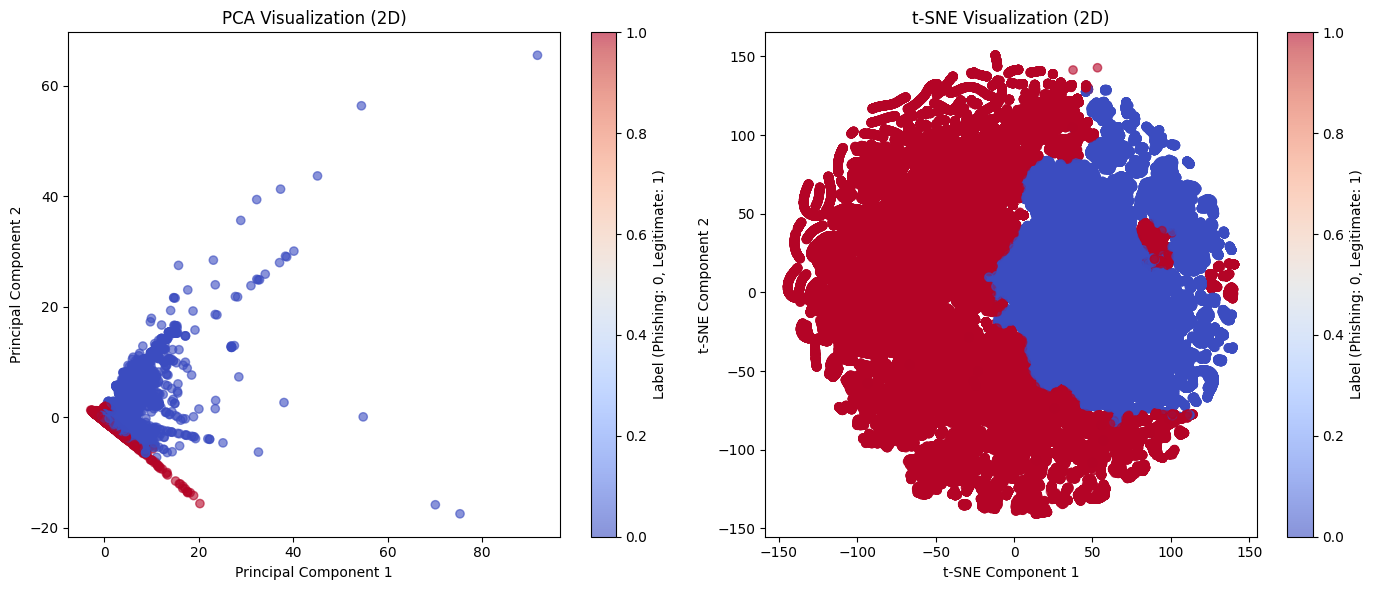

In [5]:
X = df.drop(columns=['label'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

labels = df['label']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.6)
plt.title('PCA Visualization (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label (Phishing: 0, Legitimate: 1)')

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='coolwarm', alpha=0.6)
plt.title('t-SNE Visualization (2D)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Label (Phishing: 0, Legitimate: 1)')

plt.tight_layout()
plt.show()